
# IMPORTING LIBRARIES 

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

# LOADING THE DATA

In [81]:
df = pd.read_csv('hotel_bookings.csv')

# DATA EXPLORATION AND CLEANING

In [82]:
df.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,0.0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [84]:
#df['reservation_status_date'].astype('datetime64[ns]')
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

In [86]:
df.describe(include = 'object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


In [87]:
for col in df.describe(include = 'object'):
    print(col)
    print(df[col].unique())
    print('-'*90)

hotel
['Resort Hotel' 'City Hotel']
------------------------------------------------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
------------------------------------------------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
------------------------------------------------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SY

In [88]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [89]:
df.drop(['company','agent'], inplace = True, axis = 1)

In [90]:
df.dropna(inplace = True)


In [91]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

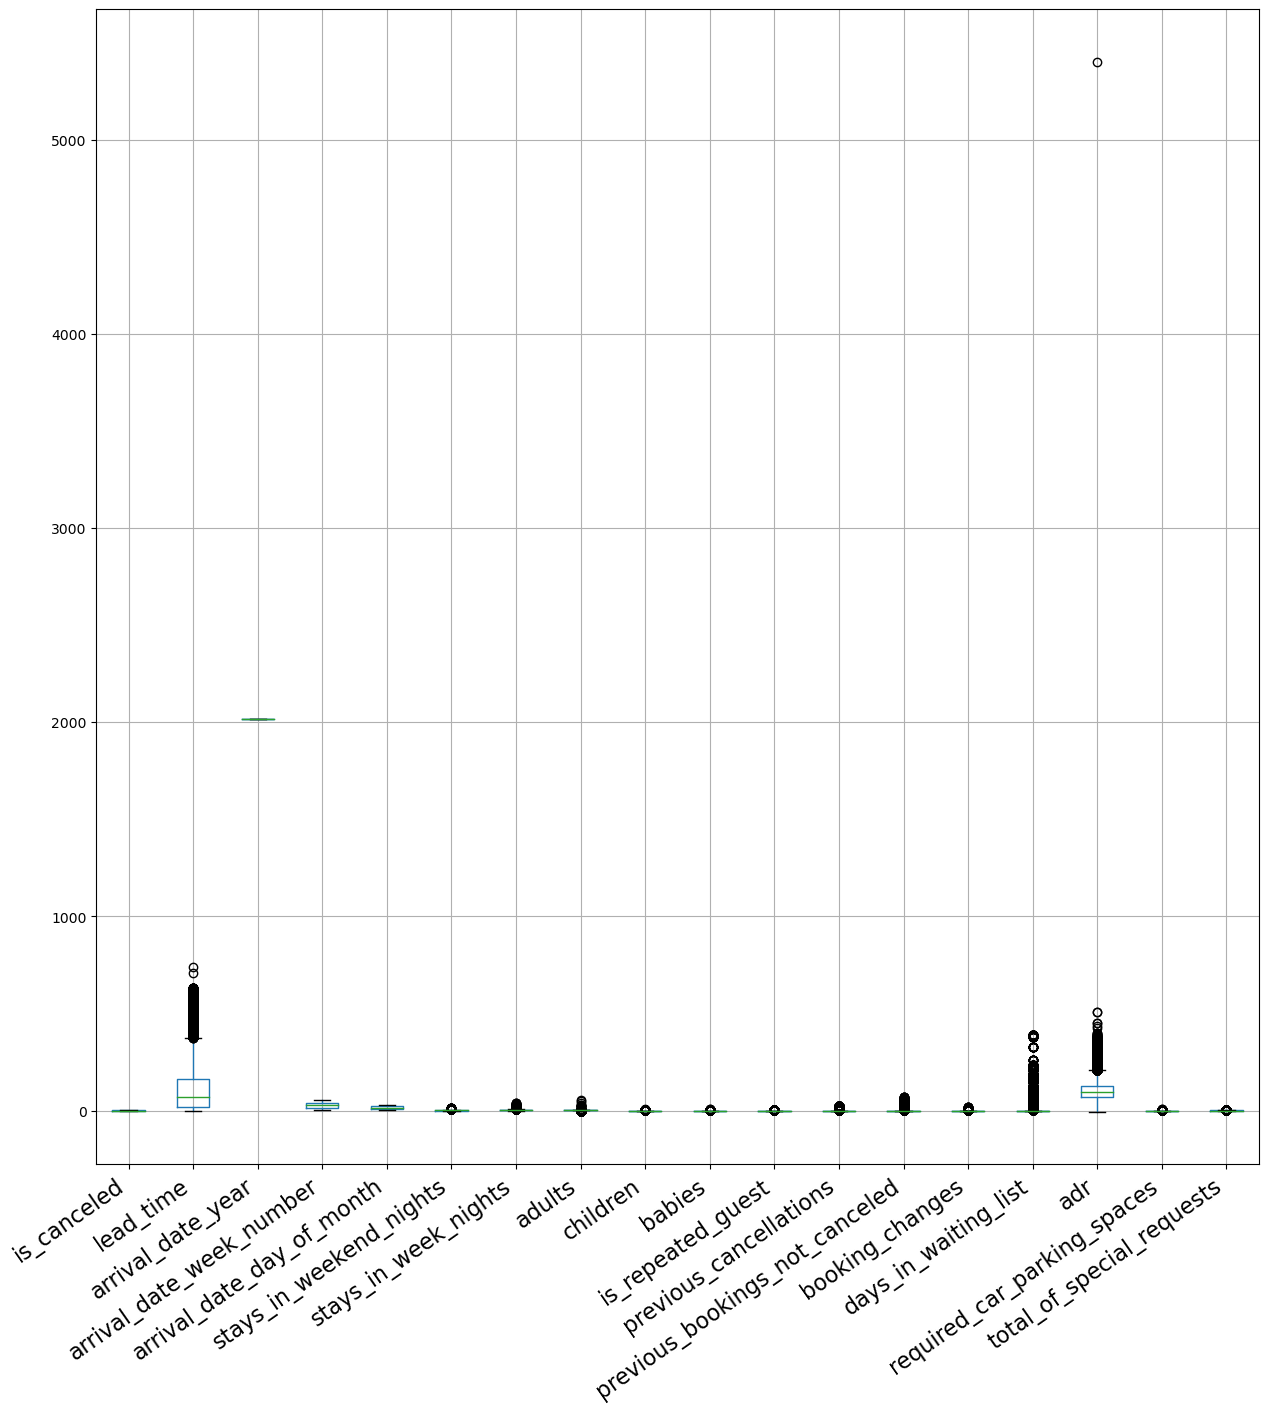

In [92]:
plt.figure(figsize = (15,15))
df.boxplot()
plt.xticks(rotation=35, horizontalalignment='right', fontsize=16)
plt.show()

In [93]:
df= df[df['adr']<5000]

# DATA ANALYSIS AND VISUALIZATION

In [94]:
cancelled_percentage = df['is_canceled'].value_counts(normalize = True)
cancelled_percentage

0    0.628653
1    0.371347
Name: is_canceled, dtype: float64

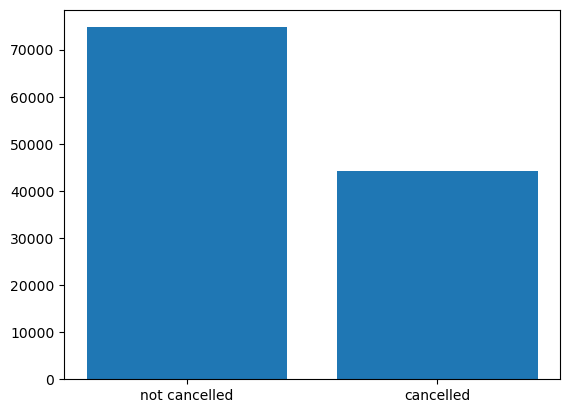

In [95]:
plt.bar(['not cancelled','cancelled'],df['is_canceled'].value_counts() )
plt.show()

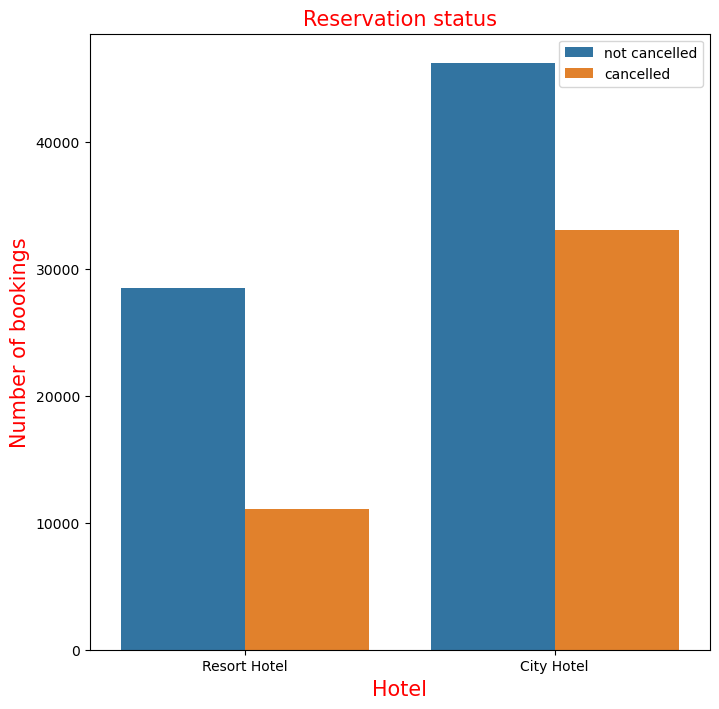

In [96]:
plt.figure(figsize =(8,8))
sns.countplot(x='hotel',hue='is_canceled',data = df )
plt.title('Reservation status', fontdict = {'fontsize': 15, 'color':'red'})
plt.xlabel('Hotel', fontdict = {'fontsize': 15, 'color':'red'})
plt.ylabel('Number of bookings', fontdict = {'fontsize': 15, 'color':'red'})
plt.legend(['not cancelled', 'cancelled'])
plt.show()

In [97]:
resorts = df[df['hotel'] == 'Resort Hotel']
resorts['is_canceled'].value_counts(normalize = True)

0    0.72025
1    0.27975
Name: is_canceled, dtype: float64

In [98]:
city_hotels = df[df['hotel'] == 'City Hotel']
city_hotels['is_canceled'].value_counts(normalize = True)

0    0.582918
1    0.417082
Name: is_canceled, dtype: float64

In [99]:
resort_1 =resorts.groupby(['reservation_status_date'])[['adr']].mean()
city_hotels_1 =city_hotels.groupby(['reservation_status_date'])[['adr']].mean()


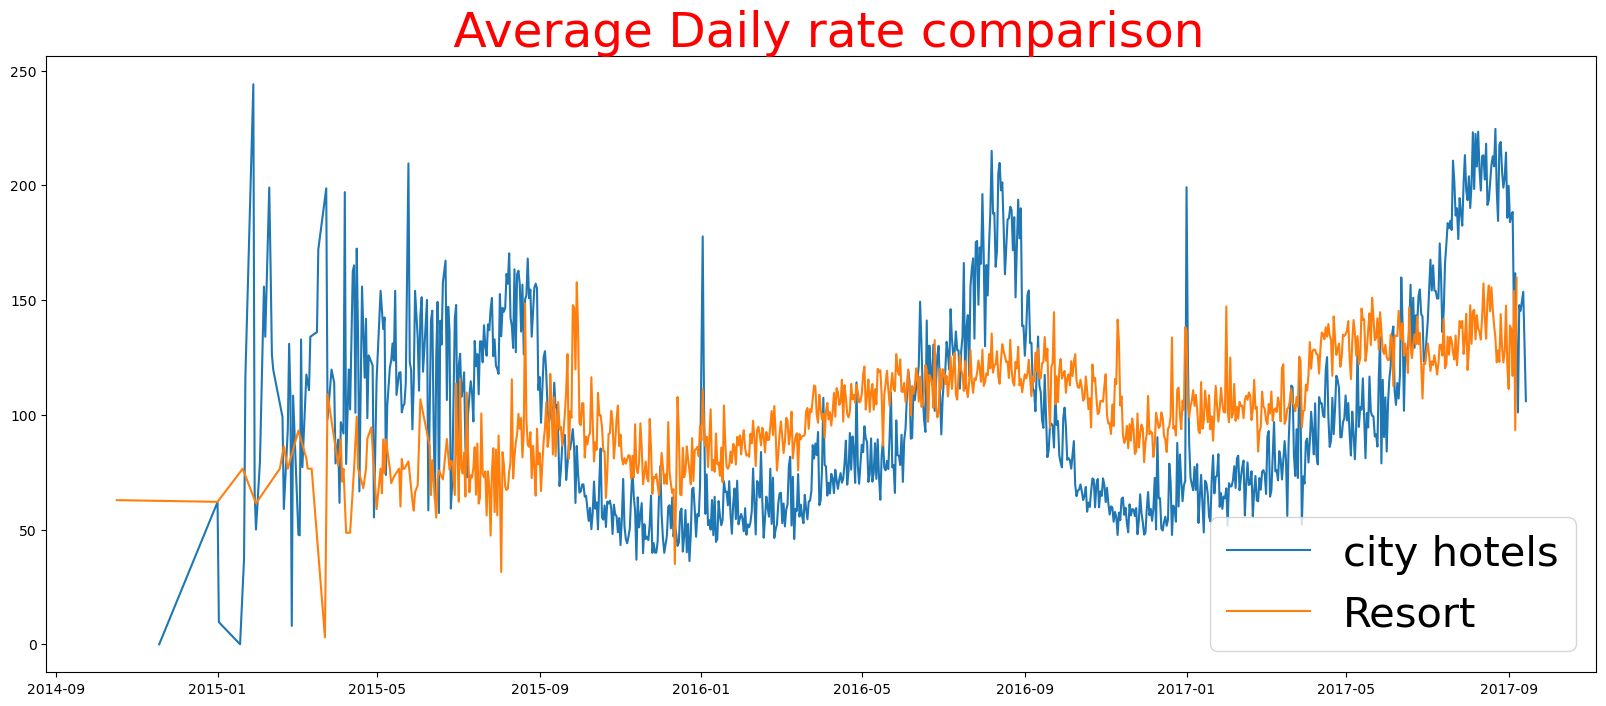

In [100]:
plt.figure(figsize = (20,8))
plt.title(" Average Daily rate comparison", fontdict = {'fontsize': 35, 'color':'red'})
plt.plot(resort_1.index, resort_1['adr'], label = 'city hotels')
plt.plot(city_hotels_1.index, city_hotels_1['adr'], label = 'Resort')
plt.legend(fontsize = 30)
plt.show()

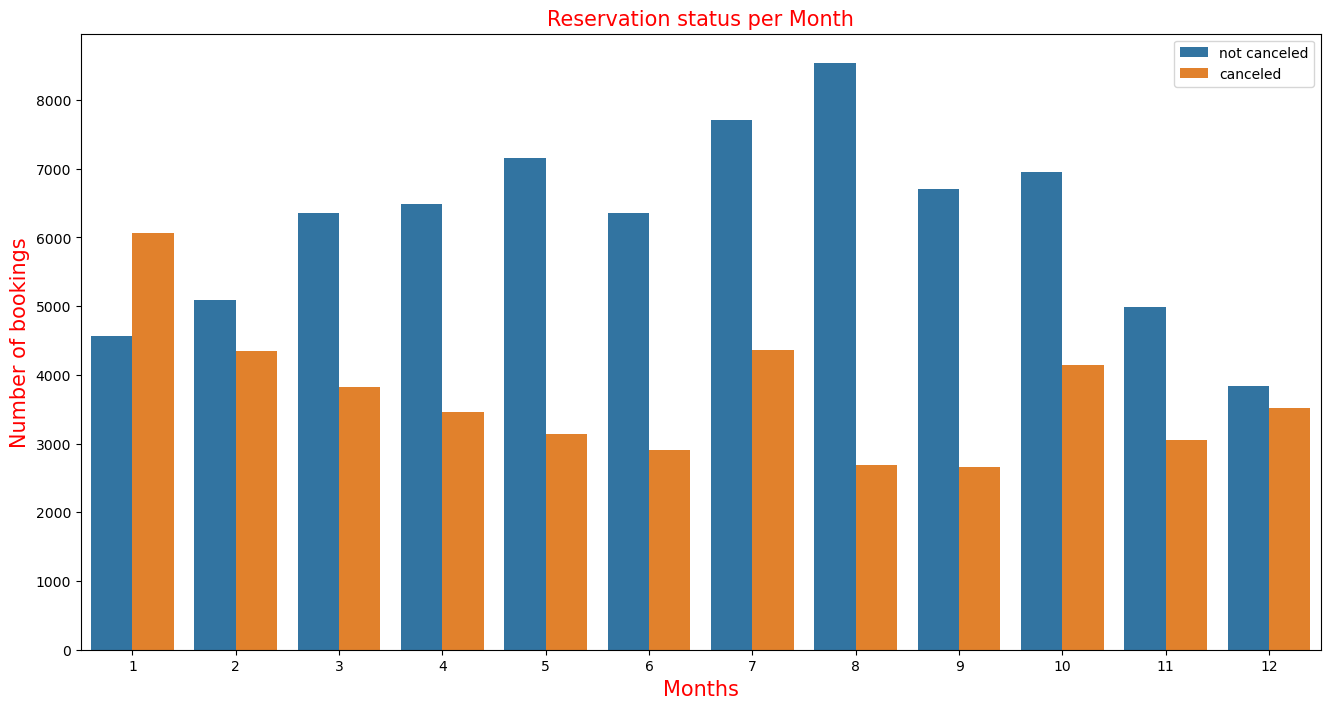

In [101]:
df['month'] = df['reservation_status_date'].dt.month
plt.figure(figsize =(16,8))
sns.countplot(x='month',hue='is_canceled',data = df )
plt.title('Reservation status per Month', fontdict = {'fontsize': 15, 'color':'red'})
plt.xlabel('Months', fontdict = {'fontsize': 15, 'color':'red'})
plt.ylabel('Number of bookings', fontdict = {'fontsize': 15, 'color':'red'})
plt.legend(['not canceled', 'canceled'])
plt.show()

Text(0.5, 1.0, ' ADR Per Month')

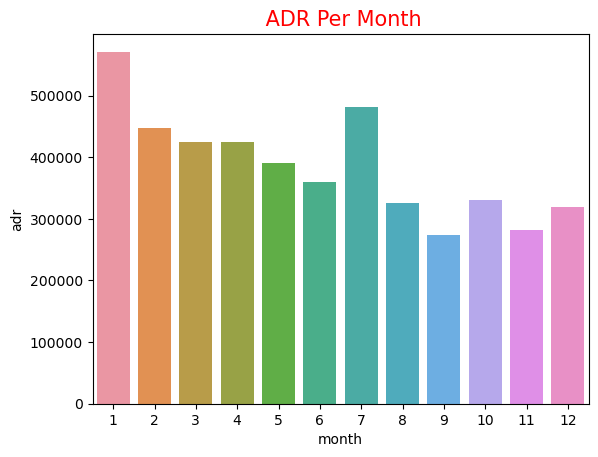

In [102]:
sns.barplot(x='month',y='adr', data = df[df['is_canceled'] == 1].groupby('month')[['adr']].sum().reset_index())
plt.title(" ADR Per Month" ,fontsize = 15, color = 'red' )


Index(['PRT', 'GBR', 'ESP', 'FRA', 'ITA', 'DEU', 'IRL', 'BRA', 'USA', 'BEL'], dtype='object')

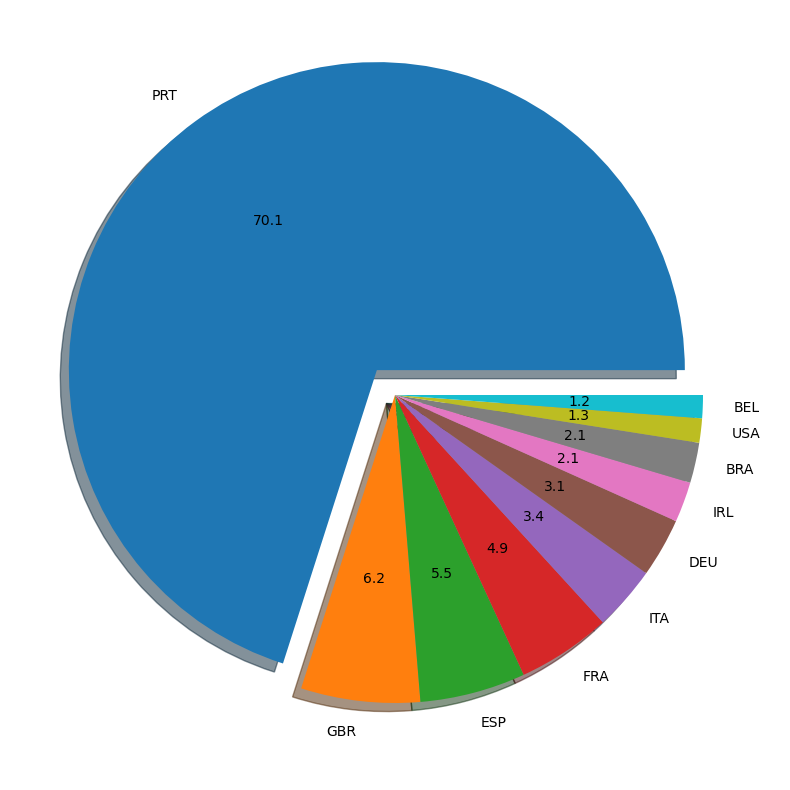

In [103]:
plt.figure(figsize = (10,10))
exp = [ 0.1,0,0,0,0,0,0,0,0,0]
cancelled_data = df[df['is_canceled']==1]
top10_countries = cancelled_data['country'].value_counts()[:10]
plt.pie(top10_countries, autopct = '%.1f', labels = top10_countries.index, explode = exp, shadow = True)
top10_countries.index

In [104]:
df['market_segment'].value_counts(normalize=True)

Online TA        0.474377
Offline TA/TO    0.203193
Groups           0.166581
Direct           0.104696
Corporate        0.042987
Complementary    0.006173
Aviation         0.001993
Name: market_segment, dtype: float64

In [105]:
cancelled_data['market_segment'].value_counts(normalize=True)

Online TA        0.469696
Groups           0.273985
Offline TA/TO    0.187466
Direct           0.043486
Corporate        0.022151
Complementary    0.002038
Aviation         0.001178
Name: market_segment, dtype: float64

Text(0.5, 1.0, ' ADR Corresponding To Date')

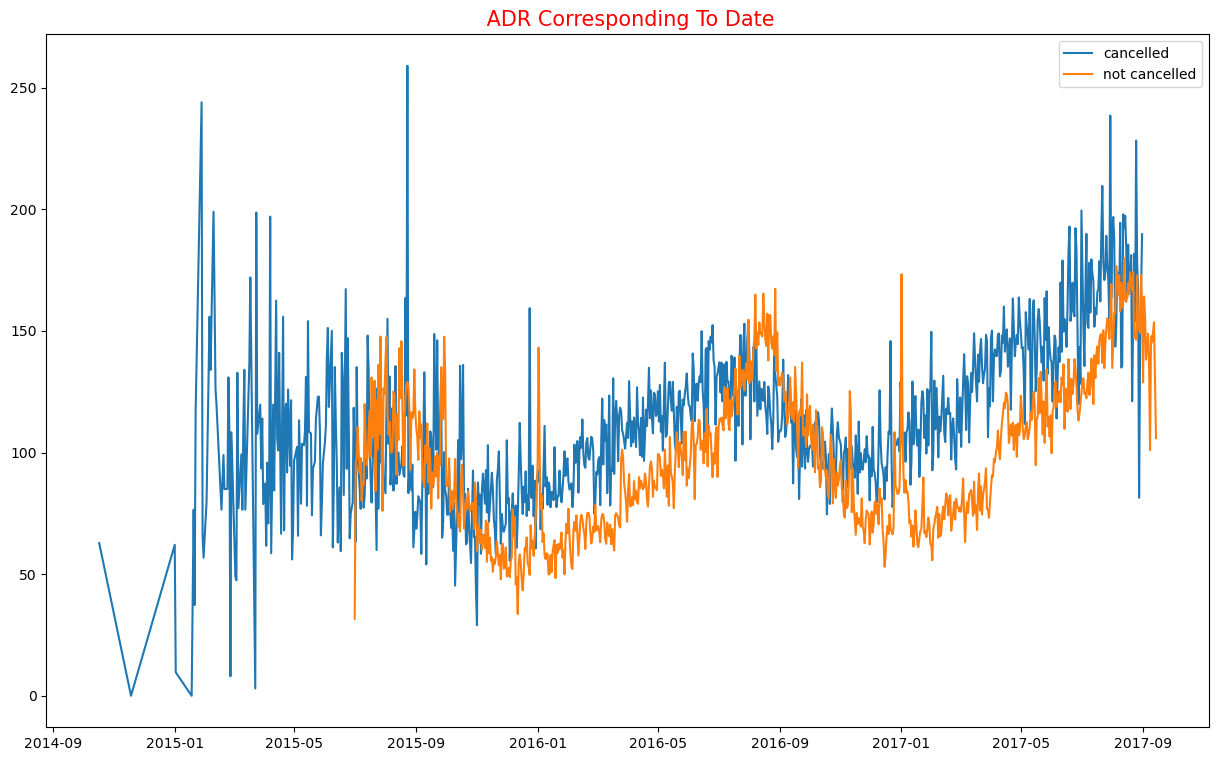

In [127]:
cancelled_data_adr = cancelled_data.groupby('reservation_status_date')[['adr']].mean()
cancelled_data_adr.reset_index(inplace =True)
cancelled_data_adr.sort_values('reservation_status_date', inplace =True)
#.reset_index(inplace =True)


not_cancelled_data = df[df['is_canceled']==0]
not_cancelled_data_adr = not_cancelled_data.groupby('reservation_status_date')[['adr']].mean()
not_cancelled_data_adr.reset_index(inplace =True)
not_cancelled_data_adr.sort_values('reservation_status_date', inplace =True)

plt.figure(figsize = (15,9))
plt.plot(cancelled_data_adr['reservation_status_date'],cancelled_data_adr['adr'], label = 'cancelled')
plt.plot(not_cancelled_data_adr['reservation_status_date'],not_cancelled_data_adr['adr'], label = 'not cancelled')
plt.legend(fontsize = 10)
plt.title(" ADR Corresponding To Date",fontsize = 15, color = 'red')

In [122]:
cancelled_data_adr = cancelled_data_adr[(cancelled_data_adr['reservation_status_date'] > '2015-09') & (cancelled_data_adr['reservation_status_date'] < '2017-09')]
not_cancelled_data_adr = not_cancelled_data_adr[(not_cancelled_data_adr['reservation_status_date'] > '2015-09') & (not_cancelled_data_adr['reservation_status_date'] < '2017-09')]

Text(0.5, 1.0, ' ADR Corresponding To Date')

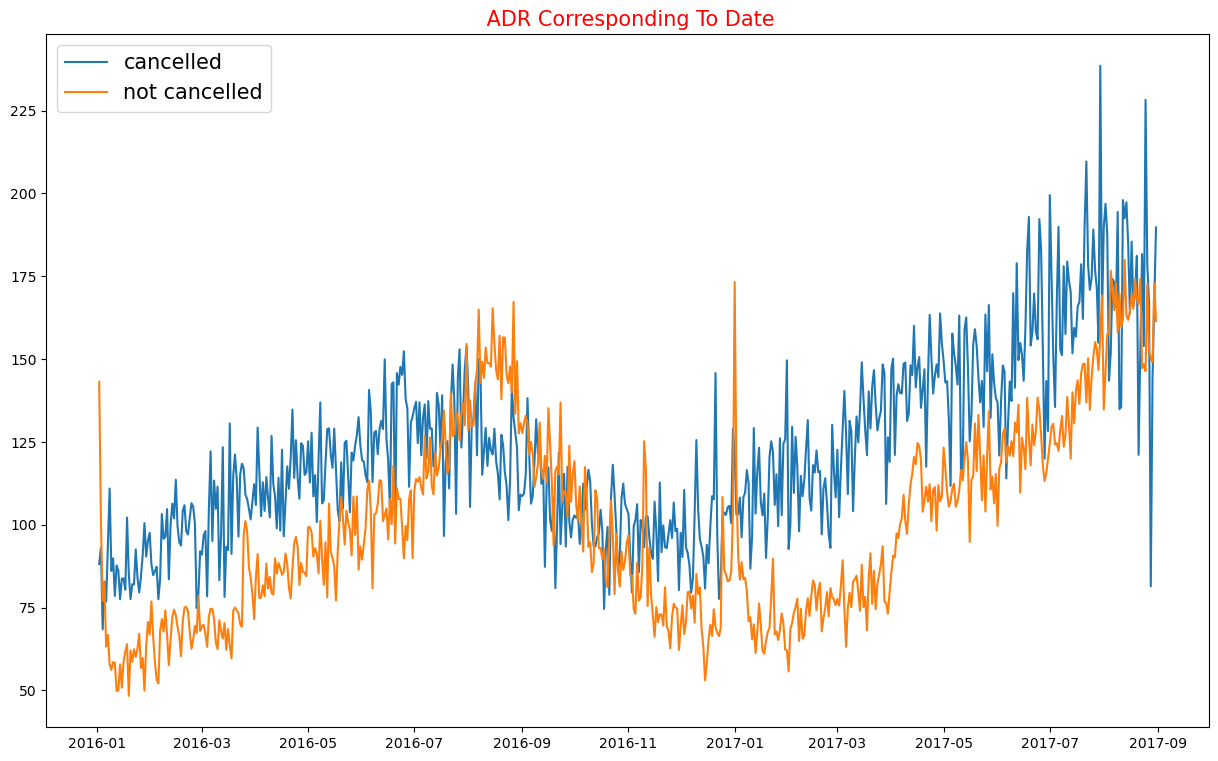

In [126]:
plt.figure(figsize = (15,9))
plt.plot(cancelled_data_adr['reservation_status_date'],cancelled_data_adr['adr'], label = 'cancelled')
plt.plot(not_cancelled_data_adr['reservation_status_date'],not_cancelled_data_adr['adr'], label = 'not cancelled')
plt.legend(fontsize = 15)
plt.title(" ADR Corresponding To Date",fontsize = 15, color = 'red')